ĐẠI HỌC QUỐC GIA – TP. HỒ CHÍ MINH
TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN
KHOA CÔNG NGHỆ THÔNG TIN
 
                                         Đồ án 1 - Color Compression 
 
Môn học: Toán ứng dụng và thống kê cho công nghệ thông tin - MTH00057

Giảng viên hướng dẫn:  
- Nguyễn Đình Thúc
- Nguyễn Văn Quang Huy
- Ngô Đình Hy
 
Tp. Hồ Chí Minh, tháng 7/2023


Sinh Viên Thực Hiện:
- Họ và Tên : Cao Nguyễn Khánh
- MSSV: 21127627
- Lớp: 21CLC04

Các thư viện sử dụng cho đồ án: 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Thuật toán kmeans:
K-means là một thuật toán được sử dụng để phân cụm các pixel trong một hình ảnh vào các nhóm màu khác nhau. Mục tiêu của thuật toán là giảm số lượng màu trong ảnh, đồng thời thay thế màu của mỗi pixel bằng màu trung tâm (centroid) tương ứng của nhóm mà pixel đó thuộc về.

Cách hoạt động của thuật toán K-means như sau:

- Khởi tạo ngẫu nhiên các centroid, mỗi centroid đại diện cho một nhóm màu.

- Lặp qua các bước sau cho đến khi tiêu chí dừng được đáp ứng:
   + Gán mỗi pixel vào nhóm màu gần nhất bằng cách tính toán khoảng cách giữa pixel và các centroid.
   + Cập nhật vị trí của các centroid bằng cách tính toán trung bình các pixel thuộc cùng một nhóm màu.
   
- Khi tiêu chí dừng được đáp ứng, mỗi pixel sẽ được gán vào nhóm màu tương ứng với centroid gần nhất. Thay thế màu của mỗi pixel bằng màu của centroid tương ứng sẽ giảm số lượng màu của ảnh, làm cho ảnh trở nên đơn giản và giảm kích thước dữ liệu.


'''
    K-Means algorithm
    
    Inputs:
        img_1d : np.ndarray with shape=(height * width, num_channels)
            Original image in 1d array
        
        k_clusters : int
            Number of clusters
            
        max_iter : int
            Max iterator
            
        init_cluster : str
            The way which use to init centroids
            'random' --> centroid has `c` channels, with `c` is initial random in [0,255]
            'in_pixels' --> centroid is a random pixels of original image
            
    Outputs:
        centroids : np.ndarray with shape=(k_clusters, num_channels)
            Store color centroids
            
        labels : np.ndarray with shape=(height * width, )
            Store label for pixels (cluster's index on which the pixel belongs)
    
'''

In [6]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
   
    num_channels = img_1d.shape[1]
    num_pixels = img_1d.shape[0]
    
    # Khởi tạo centroids
    if (init_centroids == 'random'):
        centroids = np.random.randint(0, 256, size = (k_clusters, num_channels))
    else: 
        if (init_centroids == 'in_pixels'):
            random_indices = np.random.randint(0, num_pixels, size = k_clusters)
            centroids = img_1d[random_indices]      
        else:
            raise ValueError("Invalid initialization method. Please choose 'random' or 'in_pixels'.")
    
    for _ in range(max_iter):
        
        # Tính toán khoảng cách của mỗi pixel đến các centroid
        '''Khởi tạo một mảng để lưu trữ các khoảng cách khởi tạo một mảng distances
        với hình dạng (img_1d.shape[0], k_clusters) để lưu trữ khoảng cách giữa mỗi pixel và mỗi centroids. 
        Số hàng bằng số pixel và số cột bằng số centroids.'''
        
        distances = np.zeros((num_pixels, k_clusters))
        
        # Tính khoảng cách từng pixel tới centroids
        for i in range(k_clusters):
            
            centroid_diff = img_1d - centroids[i]
            squared_diff = centroid_diff ** 2
            sum_squared_diff = np.sum(squared_diff, axis=1)           
            distances[:, i] = np.sqrt(sum_squared_diff)
        
        # Gán từng pixel vào cụm gần nhất
        labels = np.argmin(distances, axis=1)
        # Cập nhật centroids
        for i in range(k_clusters):
            # Chọn các pixel thuộc về cụm i
            cluster_pixels = img_1d[labels == i]
        
            # Kiểm tra xem cụm có rỗng không
            if cluster_pixels.size > 0:
                # Tính giá trị trung bình của pixel cho mỗi kênh màu
                mean_values = np.mean(cluster_pixels, axis=0)
                
                # Cập nhật centroids cho cụm i
                centroids[i] = mean_values
    
    return centroids, labels

Hàm Chuyển đổi hình ảnh sang ma trận 1 chiều:

 HÌnh ảnh => Ma trận 2 chiều => Ma trận 1 chiều

In [7]:
def converse_image_array1D(image):
    # Chuyển đổi ảnh
    img_array = np.array(image)
    
    # Reshape ảnh thành mảng 1D
    img_1d = img_array.reshape(-1, 3)
    
    return img_1d

Hàm Chuyển đổi ma trận 1 chiều sang hình ảnh:

  Ma trận 1 chiều => Ma trận 2 chiều  => HÌnh ảnh

In [8]:
def converse_array1d_image(array1D, image1):
    
    img_array_old = np.array(image1)
    img_array = array1D.reshape(img_array_old.shape).astype(np.uint8)
    image = np.array(img_array)
    
    # Trả về ảnh mới
    return image
    

Hàm Main:
 - nhập vào tên tập tin ảnh
 - số lượng màu mong muốn
 - nhập vào tên tập tin ảnh sẽ được lưu trữ

nhap ten file anh: anh3.jpg


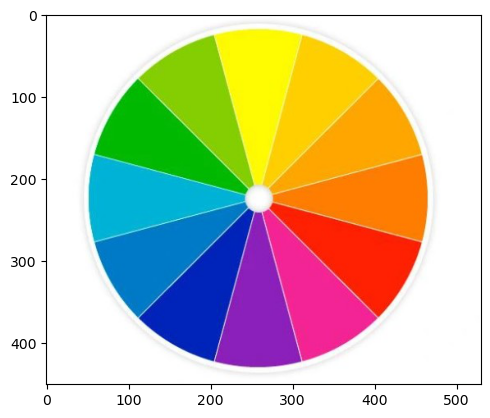

Nhập một số k: 7
nhap ten file anh can luu: k=7.jpg


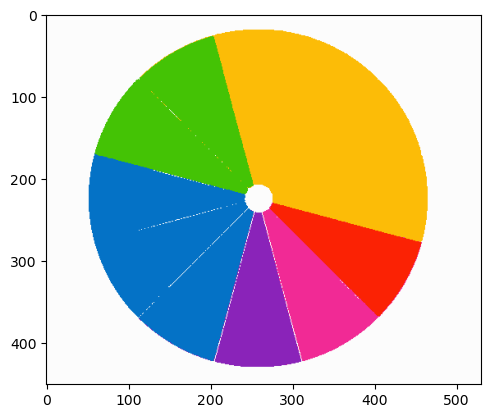

In [17]:
# MAIN


image_path = input("nhap ten file anh: ")

# Đọc ảnh
image = Image.open(image_path)

plt.imshow(image)
plt.show()


array_1d = converse_image_array1D(image)

k = int(input("Nhập một số k: "))

image_output_path = input("nhap ten file anh can luu: ")



max_iterations = 12
centroids, labels = kmeans(array_1d, k, max_iterations, 'random')

# Thay thế màu của mỗi pixel bằng màu của centroid tương ứng
array_1d = centroids[labels]



new_image = converse_array1d_image(array_1d, image)
    
plt.imshow(new_image)
plt.savefig(image_output_path)
plt.show()




KẾT QUẢ: với k = {2, 3, 5, 7}

Ảnh gốc:
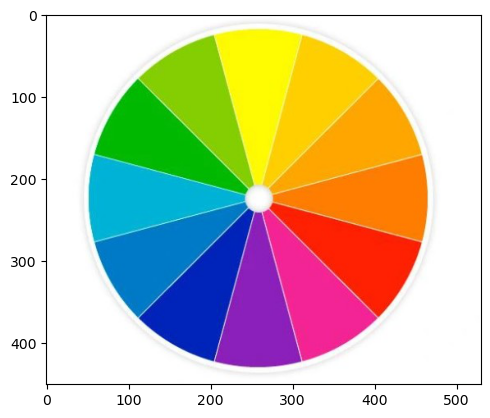

k = 2 
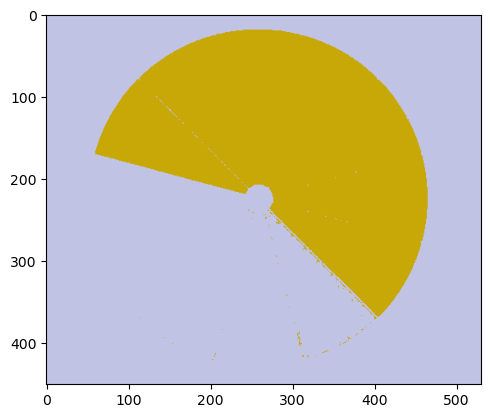


k = 3
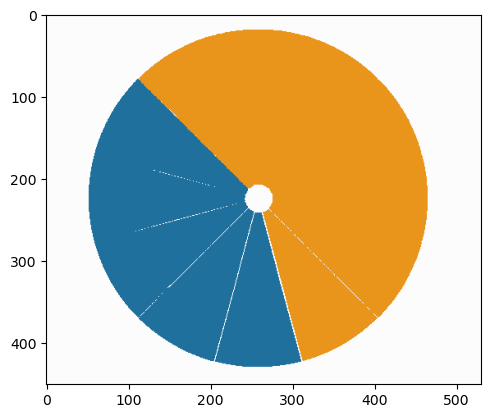


k = 5
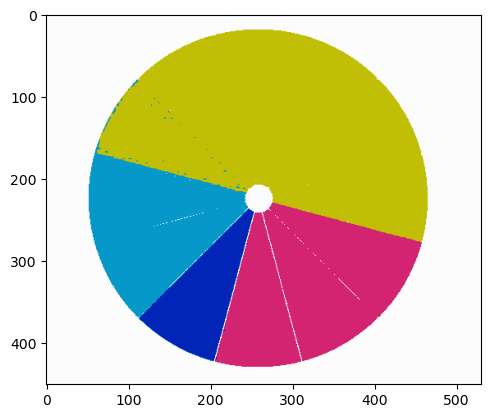


k = 7
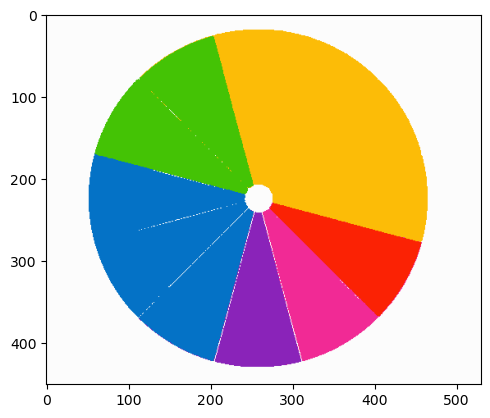




NHẬN XÉT:

- Phân cụm dựa trên khoảng cách: K-means phân cụm dựa trên khoảng cách giữa các pixel và centroid. Nó tạo ra các cụm màu dựa trên sự tương đồng về khoảng cách và làm cho các pixel trong cùng một cụm có màu tương tự.
- Phụ thuộc vào số lượng cụm(k): Số cụm cần được lựa chọn một cách hợp lý để đảm bảo thuật toán tạo ra phân cụm chính xác và ý nghĩa.
- Khi giảm số lượng màu của ảnh, sự chi tiết và độ sắc nét của ảnh sẽ giảm đi. Điều này xảy ra vì các vùng màu tương tự trong ảnh được gom lại thành các cụm màu đại diện, dẫn đến sự mất mát thông tin về màu sắc. Các chi tiết nhỏ và thay đổi màu sắc nhỏ cũng có thể bị mất đi.

Tài Liệu Tham Khảo:
- ChatGPT